# Import necessary libraries


In [3]:
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sns         
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set(style="whitegrid")



# Data Exploration and Visualization

### Load the Dataset

In [4]:
ad = pd.read_csv(r'D:\Machine Learning\Cyber Attack Detection\IDS - IDS.csv.csv') 

### Dataset Description

The dataset used in this project is a network session log dataset named IDS.csv, designed for intrusion detection system (IDS) analysis using machine learning techniques. It contains multiple features related to network activity, including protocol type, session duration, login attempts, and encryption methods. Each row represents a unique network session identified by a session_id.

The primary goal is to classify whether a session is benign or malicious, as indicated by the binary target column: attack_detected, where 1 represents an attack and 0 denotes normal activity.

The dataset includes the following key features:

network_packet: Number of network packets in the session

protocol_type: Type of protocol used (TCP, UDP, ICMP)

login_attempts: Number of login attempts made in the session

session_duration: Duration of the session in seconds

encryption_used: Type of encryption applied (AES, DES, or None)

ip_reputation_sc: A score (0 to 1) indicating the trustworthiness of the IP

failed_logins: Number of failed login attempts

browser_type: Web browser used (e.g., Chrome, Firefox, Edge)

unusual_time_access: Boolean (0/1) indicating if access occurred during abnormal hours

attack_detected (target): Indicates if the session was malicious (1) or not (0)

### Display the first 5 rows


In [5]:
ad.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


### Shape of Dataset

In [6]:

print("Dataset Shape:")
print(f"Total rows: {ad.shape[0]}")
print(f"Total columns: {ad.shape[1]}")

Dataset Shape:
Total rows: 9537
Total columns: 11


### Description of Dataset

In [7]:
print("Summary Statistics:")
print(ad.describe())

Summary Statistics:
       network_packet_size  login_attempts  session_duration  \
count          9537.000000     9537.000000       9537.000000   
mean            500.430639        4.032086        792.745312   
std             198.379364        1.963012        786.560144   
min              64.000000        1.000000          0.500000   
25%             365.000000        3.000000        231.953006   
50%             499.000000        4.000000        556.277457   
75%             635.000000        5.000000       1105.380602   
max            1285.000000       13.000000       7190.392213   

       ip_reputation_score  failed_logins  unusual_time_access  \
count          9537.000000    9537.000000          9537.000000   
mean              0.331338       1.517773             0.149942   
std               0.177175       1.033988             0.357034   
min               0.002497       0.000000             0.000000   
25%               0.191946       1.000000             0.000000   
50%    

### type of column

In [8]:
print("Column Data Types:")
print(ad.dtypes)

Column Data Types:
session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object


### Unique Values

In [9]:
for col in ad.columns:
    print(f"{col}: {ad[col].nunique()} unique values")

session_id: 9537 unique values
network_packet_size: 959 unique values
protocol_type: 3 unique values
login_attempts: 13 unique values
session_duration: 9532 unique values
encryption_used: 2 unique values
ip_reputation_score: 9537 unique values
failed_logins: 6 unique values
browser_type: 5 unique values
unusual_time_access: 2 unique values
attack_detected: 2 unique values


### Missing Values in Each Column

In [10]:
print(ad.isnull().sum())

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


### Target Column Distribution

In [11]:
print(ad['attack_detected'].value_counts())

attack_detected
0    5273
1    4264
Name: count, dtype: int64


## Visualization

###  Target distribution

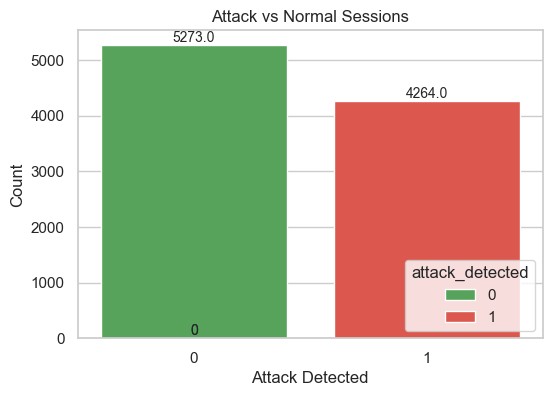

In [12]:
custom_colors = ['#4CAF50', '#F44336']  

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='attack_detected',hue='attack_detected', data=ad, palette=custom_colors)

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

plt.title('Attack vs Normal Sessions')
plt.xlabel('Attack Detected')
plt.ylabel('Count')
plt.show()


### Distribution of Session Duration

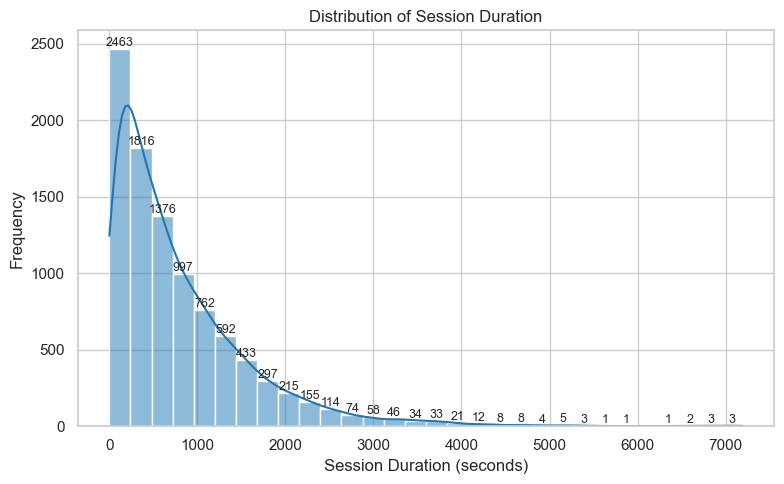

In [13]:
plt.figure(figsize=(8, 5))

# Plot the histogram and capture the bars
ax = sns.histplot(ad['session_duration'], kde=True, color='#1f77b4', bins=30)

# Add value labels on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:  # Avoid labeling empty bars
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=9)

plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Correlation Heatmap

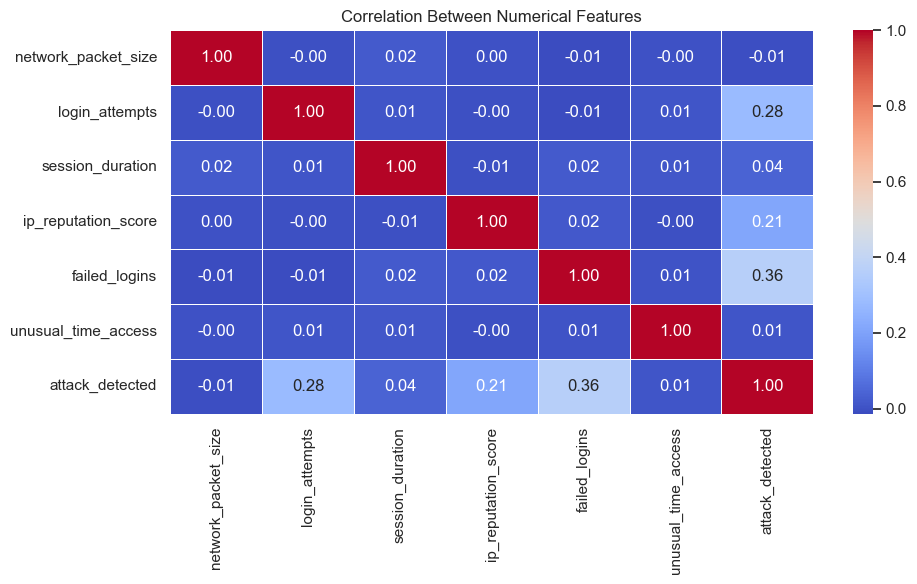

In [14]:
plt.figure(figsize=(10, 6))
corr_matrix = ad.corr(numeric_only=True)  # handles any categorical safely
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()


# Data Preprocessing

### Fix missing values

In [15]:
ad['encryption_used'] = ad['encryption_used'].fillna('missing')
print(ad['encryption_used'].isnull().sum())

0


### Count each category

In [16]:
print(ad['encryption_used'].value_counts())

encryption_used
AES        4706
DES        2865
missing    1966
Name: count, dtype: int64


### Categorical Feature vs Target

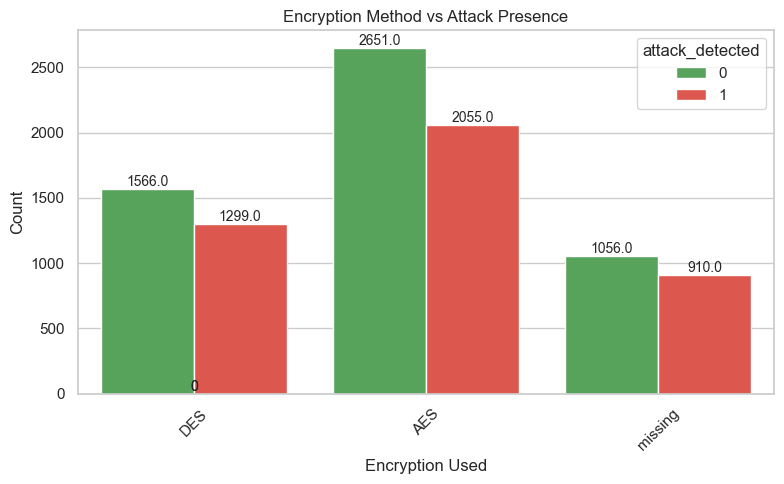

In [17]:
custom_colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='encryption_used', hue='attack_detected', data=ad, palette=custom_colors)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

plt.title('Encryption Method vs Attack Presence')
plt.xlabel('Encryption Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Drop column(unnecessary)

In [18]:
ad.drop('session_id', axis=1, inplace=True)

### Outlier Detection(IQR method)

In [19]:
numeric_cols = ['network_packet_size', 'login_attempts', 'session_duration',
                'ip_reputation_score', 'failed_logins']

# Detect and mark outliers
outlier_indices = set()

for col in numeric_cols:
    Q1 = ad[col].quantile(0.25)
    Q3 = ad[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ad[(ad[col] < lower) | (ad[col] > upper)].index
    outlier_indices.update(outliers)

print(f"Total rows with at least one outlier: {len(outlier_indices)}")

Total rows with at least one outlier: 963


###  Boxplot(before capping)

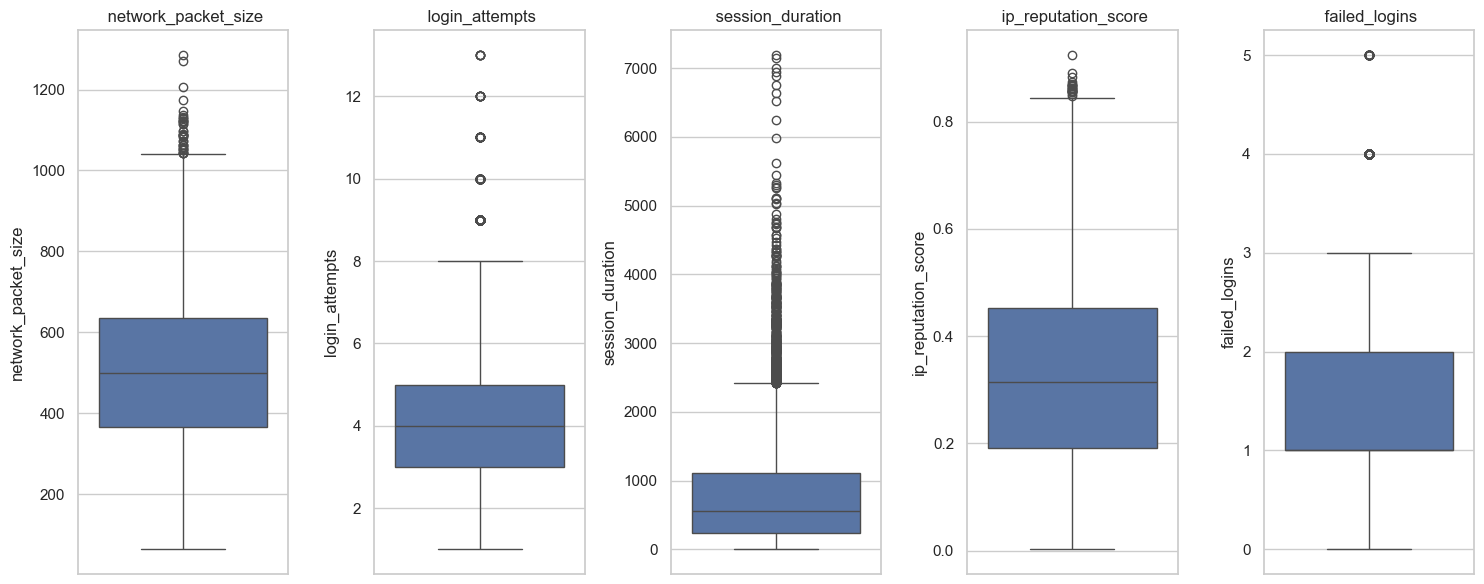

In [20]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=ad[col])
    plt.title(f' {col}')
plt.tight_layout()
plt.show()

### Outlier treatment(Capping)

In [21]:
# Make a copy to preserve the original
ad_capped = ad.copy()

# Define numeric columns to cap
numeric_cols = ['network_packet_size', 'login_attempts', 'session_duration',
                'ip_reputation_score', 'failed_logins']

# Apply capping
for col in numeric_cols:
    Q1 = ad_capped[col].quantile(0.25)
    Q3 = ad_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    ad_capped[col] = ad_capped[col].clip(lower, upper)

print("Outlier capping completed.")

Outlier capping completed.


###  Boxplot (After capping)

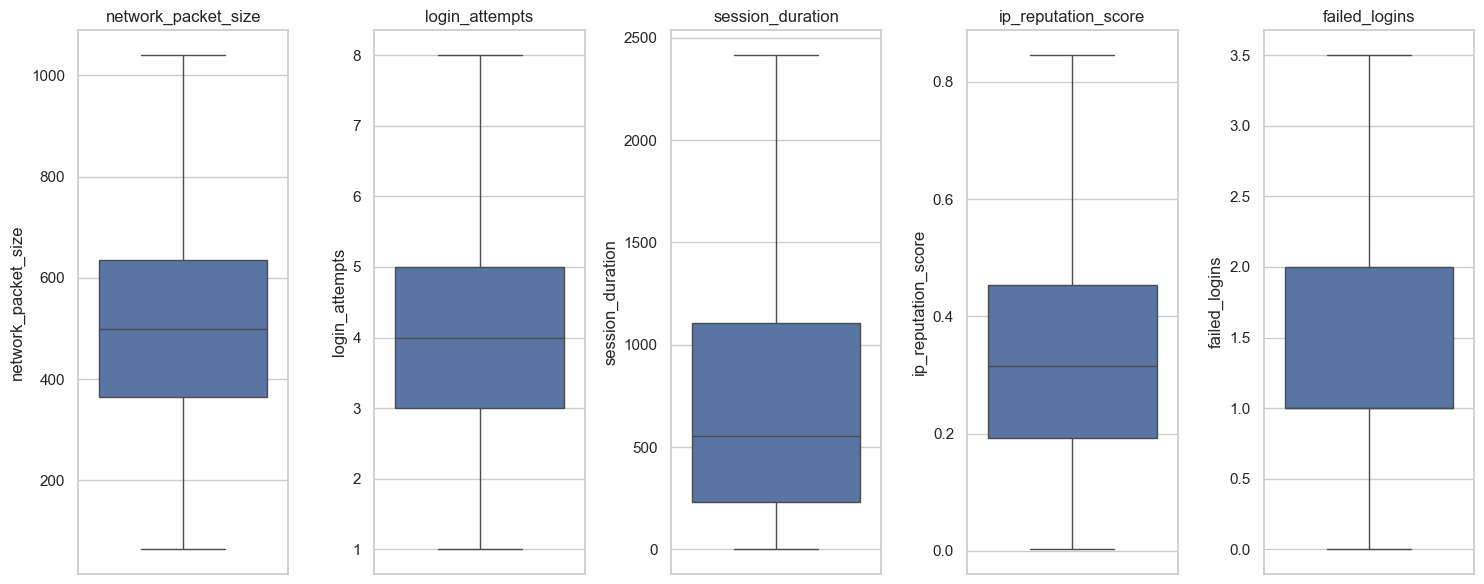

In [22]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=ad_capped[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()


### Encoding
We applied One-Hot Encoding to convert nominal categorical variables into numerical binary.

In [23]:
# One-hot encode categorical columns
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']

# Create a new DataFrame with one-hot encoded variables
ad = pd.get_dummies(ad_capped, columns=categorical_cols, drop_first=True)

# Check result
print("Shape after encoding:", ad.shape)
print(ad.head())


Shape after encoding: (9537, 15)
   network_packet_size  login_attempts  session_duration  ip_reputation_score  \
0                  599               4        492.983263             0.606818   
1                  472               3       1557.996461             0.301569   
2                  629               3         75.044262             0.739164   
3                  804               4        601.248835             0.123267   
4                  453               5        532.540888             0.054874   

   failed_logins  unusual_time_access  attack_detected  protocol_type_TCP  \
0            1.0                    0                1               True   
1            0.0                    0                0               True   
2            2.0                    0                1               True   
3            0.0                    0                1              False   
4            1.0                    0                0               True   

   protocol_type_

### Imbalance problem
After preprocessing, we examined the distribution of the target variable attack_detected. The dataset contains 5273 instances of class 0 (no attack) and 4264 instances of class 1 (attack), resulting in an approximate 55:45 ratio.
This distribution does not indicate a significant class imbalance. Therefore, no oversampling or undersampling techniques were applied at this stage.